###Introduction of Logistic Regression

**What is Logistic Regression?**

Logistic regression is a supervised learning algorithm used to predict a dependent categorical target variable. In essence, if you have a large set of data that you want to categorize, logistic regression may be able to help. (https://www.mastersindatascience.org/learning/machine-learning-algorithms/logistic-regression/)

**Type of Logistic Regression**
1. Binary logistic regression
* This algorithm compute the input $X$ into output $y$, where $y$ only means true or false.
* $y\in \{0,1\}$
* e.g. Is this picture has a dog? etc.
2. Multinomial logistic regression
* e.g.
* Classifying texts into what language they come from.
* Predicting whether a student will go to college, trade school or into the workforce.
* Does your cat prefer wet food, dry food or human food?
* etc.
3. Ordinal logistic regression
* Ordinal logistic regression is also a model where there are multiple classes that an item can be classified as; however, in this case an ordering of classes is required. Classes do not need to be proportionate. The distance between each class can vary.
* e.g. Movies Rate etc.

reference: https://www.mastersindatascience.org/learning/machine-learning-algorithms/logistic-regression/

**Why we do not use linear regression in this case?**

Linear Regression can only be used for predicting the relationship between continuous variable.

This algorithm is not good for classification task because
* In this case, output data can be classify into 2 values $\{0,1\}$, the linear regression algorithmn do not predict output data accuratly at all.
* In theory, $h(x)$ should be $0\leq h(x)\leq 1$ for boolean classification problem.

**What I will do in this tutorial?**
* I will demonstrate how to use SKLearn to operate Logistic Regression.

**Step**
1. Get Data
2. Creating Hypothesis Function
3. Creating Evaluating Function
4. Creating Optimization Function

**Note**
* Both linear regression and logistic regression are linear model.

###Step 1, Getting Data

**(1.) Import Data**

In [ ]:
!pip install --upgrade -q gspread

In [ ]:
# [1.] import library

from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 

# [2.] Connect Google Collab with Google Sheet
from google.colab import auth
import gspread
from google.auth import default
from google.colab import data_table

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('student-mat').get_worksheet(0)
rows = worksheet.get_all_values()
dfmain = pd.DataFrame(rows)

# [3.] Display Data form Google Sheet
dfmain.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


**(2.) Clean Data**

Now we have the data. However we have to reorganize (clean) the data before analyse the data, because computer cannot analyse string data type. In addition, cleaning data help us analyse data more easily.

In [ ]:
# [1.] Get string from the first row of every columns
# reference: https://www.easytweaks.com/get-first-row-pandas-dataframe/
ColumnName = dfmain.iloc[0].to_list()

# [2.] Rename every column
for i in range(len(ColumnName)):
  ColumnName[i]=ColumnName[i]+'_'+str(i)
  dfmain.rename(columns={i:ColumnName[i]},inplace=True)

# [3.] Drop first row
dfmain=dfmain.drop([0], axis=0)

# [4.] Change Data Type
# reference: https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
# reference: https://statisticsglobe.com/convert-string-boolean-pandas-dataframe-column-python
# reference: https://sparkbyexamples.com/pandas/pandas-convert-column-to-numpy-array/
# reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
# reference: https://stackoverflow.com/questions/2468334/creating-dynamic-and-expandable-dictionaries-in-python
# reference: https://favtutor.com/blogs/merge-dictionaries-python
# reference: https://datagy.io/python-int-to-binary/

# VectorName is used for indicate the meaning of the vector in each categorized data based column
# VectorName = [[ColumnIndex,ColumnDict],...,[ColumnIndex,ColumnDict]]
VectorName=[]

# BinaryVector(lengh) is a function that is used for generate vector
def BinaryVector(lengh):
  mathbbR = math.ceil(math.log2(lengh))
  categorization = []
  for element in range(lengh):
    binary = str(bin(element)).split('b')[1]
    vector = []
    for k in range(mathbbR-len(binary)):
      vector.append(0)
    for i in binary:
      vector.append(int(i))
    categorization.append(vector)
  categorization=np.array(categorization)
  return categorization

# Change the data type of every column in dfmain
for i in range(len(ColumnName)):
  IsD=np.array(dfmain[ColumnName[i]])[0]
  if IsD.isdigit():
    # Change data type from String into Integer
    dfmain[ColumnName[i]]=dfmain[ColumnName[i]].apply(pd.to_numeric)
  else:
    # Change data type from String into Vector that contains 0 and 1
    dfColumn = dfmain[ColumnName[i]].to_numpy()
    ListValue=list(np.sort(pd.Series(np.array(dfColumn)).value_counts().index.to_numpy()))
    # Create Binary Vecotr Dictionary
    Convert = { "data":[]}
    Category=BinaryVector(len(ListValue))
    for j in range(len(ListValue)):
      ConvertData = {}
      ConvertData[ListValue[j]] = Category[j]
      Convert["data"].append(ConvertData)
    for k in range(len(Convert['data'])):
      if (k!=0):
        Convert['data'][k].update(Convert['data'][k-1])
      else:
        continue
    # Update the dfmain and VectorName
    VectorName.append([i,Convert['data'][-1]])
    dfmain[ColumnName[i]] = dfmain[ColumnName[i]].map(dict(Convert['data'][-1]))

In [ ]:
dfmain.head()

,school_0,sex_1,age_2,address_3,famsize_4,Pstatus_5,Medu_6,Fedu_7,Mjob_8,Fjob_9,...,famrel_23,freetime_24,goout_25,Dalc_26,Walc_27,health_28,absences_29,G1_30,G2_31,G3_32
1,[0],[0],18,[1],[0],[0],4,4,"[0, 0, 0]","[1, 0, 0]",...,4,3,4,1,1,3,6,5,6,6
2,[0],[0],17,[1],[0],[1],1,1,"[0, 0, 0]","[0, 1, 0]",...,5,3,3,1,1,3,4,5,5,6
3,[0],[0],15,[1],[1],[1],1,1,"[0, 0, 0]","[0, 1, 0]",...,4,3,2,2,3,3,10,7,8,10
4,[0],[0],15,[1],[0],[1],4,2,"[0, 0, 1]","[0, 1, 1]",...,3,2,2,1,1,5,2,15,14,15
5,[0],[0],16,[1],[0],[1],3,3,"[0, 1, 0]","[0, 1, 0]",...,4,3,2,1,2,5,4,6,10,10


###(1) Binary Logistic Regression with Sklearn, with continuous single input

**(1.) Choose and clean the variable**

In [ ]:
ind_X=32
ind_Y=20
ColumnNameX=ColumnName[ind_X]
ColumnNameY=ColumnName[ind_Y]
dfmain=dfmain

In [ ]:
# The variables are updated.

# FOR X

# Reshape the vector or matrix for linear algebra operation

dfmain_X = np.array(dfmain[ColumnNameX]).reshape(-1,1)

# FOR Y

# [array[...] array[...] array[...] ... array[...]] \to [...]
# This solution can only be used with binary logistic regression
# For the simplicity, I will use this code
# reference: https://stackoverflow.com/questions/27516849/how-to-convert-list-of-numpy-arrays-into-single-numpy-array

dfmain_Y = np.stack(list(np.array(dfmain[ColumnNameY]))).reshape(-1)

**(2.) Train and use the logistic regression model**

In [ ]:
from sklearn import linear_model

logr = linear_model.LogisticRegression()
logr.fit(np.array(dfmain_X).reshape(-1,1),dfmain_Y)

predicted = logr.predict(np.array([-40]).reshape(-1,1))

print(predicted)

[0]


**(3.) Get the $\vec{h}$ inside $h()$ (a.k.a. Hypothesis Function)**

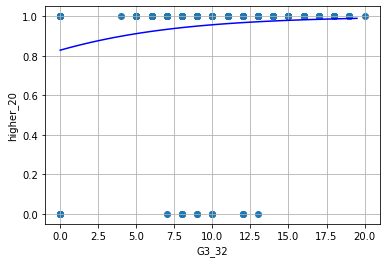

h_i[1] = [0.15344912]
h_i[0] = [1.57709257]


'\nNote: I got h_i = [1.32865499 0.17638434]\n'

In [ ]:
def HypothesisFunction(x,logr):
  probability = 1 / (1 + np.exp(-(logr.coef_ * x + logr.intercept_)))
  '''
  Note:
  * logr.coef_ = h_i[1]
  * logr.intercept_ = h_i[0]
  '''
  return(probability.reshape(-1))

# Here is the data.
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

# Add labels to the x- and y-axis.
plt.xlabel(ColumnNameX)
plt.ylabel(ColumnNameY)

# Data is plotted.
plt.scatter(dfmain[ColumnNameX], dfmain[ColumnNameY])

# Here is the hypothesis function a.k.a. prediction function.
xline = np.arange(0,20,0.5)
yline = HypothesisFunction(xline,logr)

plt.plot(xline, yline, color='blue')
plt.show()

print('h_i[1] = '+str(logr.coef_[0]))
print('h_i[0] = '+str(logr.intercept_))

'''
Note: I got h_i = [1.32865499 0.17638434]
'''

**(4.) Evaluate the accuracy of the $h()$ (a.k.a. Hypothesis Function)**

In [ ]:
def HypothesisFunction(x,logr):
  probability = 1 / (1 + np.exp(-(logr.coef_ * x + logr.intercept_)))
  return(probability.reshape(-1))

def EvaluationFunction(data,ind_x,ind_y,logr):
  num=0
  for i in range(data.shape[0]):
    num-=data.iat[i,ind_y]*np.emath.log(HypothesisFunction(data.iat[i,ind_x],logr))+(1-data.iat[i,ind_y])*np.emath.log(1-HypothesisFunction(data.iat[i,ind_x],logr))
  num*=(1/data.shape[0])
  return num

print(EvaluationFunction(dfmain,ind_X,ind_Y,logr))

[0.18572673]


**Reference: https://www.w3schools.com/python/python_ml_logistic_regression.asp**

###(2) Binary Logistic Regression with Sklearn, with discrete single input

**(1.) Choose and clean the variable**

In [ ]:
ind_X=22
ind_Y=20
ColumnNameX=ColumnName[ind_X]
ColumnNameY=ColumnName[ind_Y]
dfmain=dfmain

In [ ]:
# The variables are updated.
# reference: https://stackoverflow.com/questions/27516849/how-to-convert-list-of-numpy-arrays-into-single-numpy-array

# FOR X
dfmain_X = np.stack(list(np.array(dfmain[ColumnNameY]))).reshape(-1)

# FOR Y
dfmain_Y = np.stack(list(np.array(dfmain[ColumnNameY]))).reshape(-1)

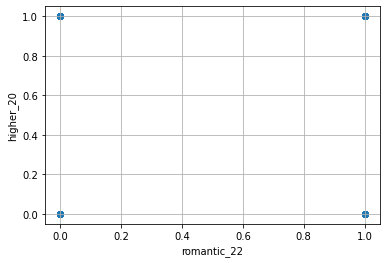

In [ ]:
# Here is the data.
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

# Add labels to the x- and y-axis.
plt.xlabel(ColumnNameX)
plt.ylabel(ColumnNameY)

# Data is plotted.
plt.scatter(dfmain[ColumnNameX], dfmain[ColumnNameY])

plt.show()

###To Do List
1. The data set from this video (https://youtu.be/tPYj3fFJGjk)
2. Apply the data set from this file and this video (https://youtu.be/tPYj3fFJGjk) into Logistic Regression tutorial
3. Create more Logistic Regression Algorithm tutorial (e.g. binary, multinomial and ordinal etc.) and explain the mathematics behind this algorithm
4. Create Logistic Regression with SKLearn and Tensorflow tutorial
5. Create Linear Regression with SKLearn and Tensorflow tutorial
6. Check and Upload Logistic Regression and Linear Regression tutorial into GitHub
7. Start Neural Network tutorial
8. Neural Network categorize the image
9. Alternative algorithm that can categorize the image
10. Neural Network draw the image
11. Alternative algorithm that can draw the image
12. ???

###[1.A]

###(1.) Logistic Regression

**The Initial Variable**

In [ ]:
print(np.array(dfmain[ColumnNameX]).shape)

(395,)


In [ ]:
print(type(dfmain[ColumnNameX]))

<class 'pandas.core.series.Series'>


In [ ]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)

[0]


In [ ]:
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print(X.shape)
print(X)

(12, 1)
[[3.78]
 [2.44]
 [2.09]
 [0.14]
 [1.72]
 [1.65]
 [4.92]
 [4.37]
 [4.96]
 [4.52]
 [3.69]
 [5.88]]


In [ ]:
from sklearn import linear_model

logr = linear_model.LogisticRegression()
logr.fit(np.array(dfmain[ColumnNameX]).reshape(-1,1),np.array(dfmain[ColumnNameY]).reshape(-1))

predicted = logr.predict(numpy.array([10]).reshape(-1,1))
print(predicted)

ValueError: ignored

**Reference:**
* https://www.w3schools.com/python/python_ml_logistic_regression.asp
* https://www.nickmccullum.com/python-machine-learning/logistic-regression-python/#the-imports-we-will-be-using-in-this-tutorial

###A.1

In [ ]:
ind_X=32
ind_Y=20
ColumnNameX=ColumnName[ind_X]
ColumnNameY=ColumnName[ind_Y]
dfmain=dfmain

print(ColumnNameX)
print(ColumnNameY)

In [ ]:
from sklearn.model_selection import train_test_split

y_data = dfmain['Survived']
x_data = dfmain.drop('Survived', axis = 1)

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

**Reference:**
* https://www.nickmccullum.com/python-machine-learning/logistic-regression-python/#creating-training-data-and-test-data

###(1.) Bi

In [ ]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

# reference: https://www.w3schools.com/python/python_ml_logistic_regression.asp

###Reference: